# Tick Bars 
---

In [1]:
import requests 

import pandas as pd
import numpy as np 
import datetime as dt 

import matplotlib.pyplot as plt 

In [2]:
ticker = "AAPL"

In [3]:

def getdata(url):
  r = requests.get(url,headers ={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'})
  data = pd.read_html(r.text)
  return data

# Import Historical Data 

In [4]:
historiscal_url= f'https://finance.yahoo.com/quote/{ticker}/history?p={ticker}'
historiscal_data = getdata(historiscal_url)
data = historiscal_data[0]
data = data.iloc[:-1 , :]
data

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Nov 02, 2022",148.95,151.99,148.09,151.43,151.43,47747985
1,"Nov 01, 2022",155.08,155.45,149.13,150.65,150.65,80321400
2,"Oct 31, 2022",153.16,154.24,151.92,153.34,153.34,97943200
3,"Oct 28, 2022",148.20,157.50,147.82,155.74,155.74,164762400
4,"Oct 27, 2022",148.07,149.05,144.13,144.80,144.80,109180200
...,...,...,...,...,...,...,...
95,"Jun 21, 2022",133.42,137.06,133.32,135.87,135.68,81000500
96,"Jun 17, 2022",130.07,133.08,129.81,131.56,131.38,134520300
97,"Jun 16, 2022",132.08,132.39,129.04,130.06,129.88,108123900
98,"Jun 15, 2022",134.29,137.34,132.16,135.43,135.24,91533000


In [5]:
data = data[data["Open"].str.contains("Dividend") == False]
data
data.dtypes

Date           object
Open           object
High           object
Low            object
Close*         object
Adj Close**    object
Volume         object
dtype: object

In [6]:
data = data.set_index(pd.DatetimeIndex(data['Date']))
data = data.drop(['Date'], axis=1)
data

,Open,High,Low,Close*,Adj Close**,Volume
Date,,,,,,
2022-11-02,148.95,151.99,148.09,151.43,151.43,47747985
2022-11-01,155.08,155.45,149.13,150.65,150.65,80321400
2022-10-31,153.16,154.24,151.92,153.34,153.34,97943200
2022-10-28,148.20,157.50,147.82,155.74,155.74,164762400
2022-10-27,148.07,149.05,144.13,144.80,144.80,109180200
...,...,...,...,...,...,...
2022-06-21,133.42,137.06,133.32,135.87,135.68,81000500
2022-06-17,130.07,133.08,129.81,131.56,131.38,134520300
2022-06-16,132.08,132.39,129.04,130.06,129.88,108123900


In [7]:
numeric_columns = list(data.columns)
for column_name in numeric_columns:
    data[column_name] = data[column_name].str.replace(',', '')
    data[column_name] = data[column_name].astype(np.float64)

data.dtypes

Open           float64
High           float64
Low            float64
Close*         float64
Adj Close**    float64
Volume         float64
dtype: object

In [16]:
columns = ['open', 'high', 'low', 'close', 'adjclose', 'volume']
data.columns = columns 

In [17]:
data

,open,high,low,close,adjclose,volume
Date,,,,,,
2022-11-02,148.95,151.99,148.09,151.43,151.43,47747985.0
2022-11-01,155.08,155.45,149.13,150.65,150.65,80321400.0
2022-10-31,153.16,154.24,151.92,153.34,153.34,97943200.0
2022-10-28,148.20,157.50,147.82,155.74,155.74,164762400.0
2022-10-27,148.07,149.05,144.13,144.80,144.80,109180200.0
...,...,...,...,...,...,...
2022-06-21,133.42,137.06,133.32,135.87,135.68,81000500.0
2022-06-17,130.07,133.08,129.81,131.56,131.38,134520300.0
2022-06-16,132.08,132.39,129.04,130.06,129.88,108123900.0


# Tick Bars 

In [18]:
up = data[data.close >= data.open]
down = data[data.close < data.open]
coldown='red'
colup = 'green'
width=0.9
width2 = 0.09

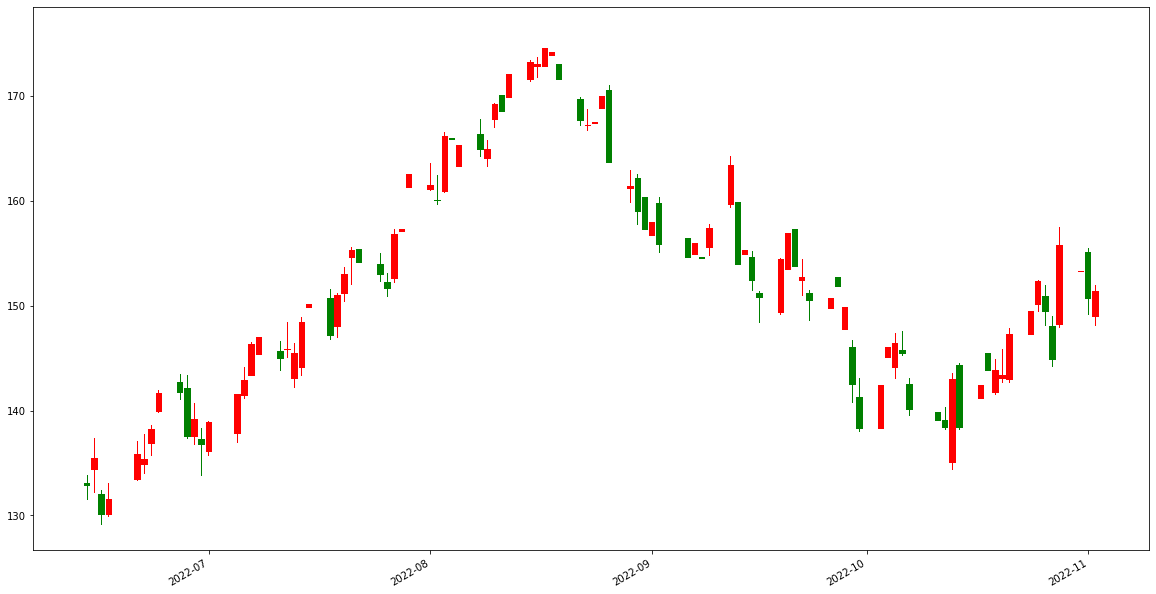

In [19]:
plt.figure(figsize=(20,10))

plt.bar(up.index, up.close-up.open, width, bottom=up.open, color=coldown)
plt.bar(up.index, up.high-up.close, width2, bottom=up.close, color=coldown)
plt.bar(up.index, up.low-up.open, width2, bottom=up.open, color=coldown)

plt.bar(down.index,down.close-down.open, width, bottom=down.open, color=colup)
plt.bar(down.index, down.high-down.open, width2, bottom=down.open, color=colup)
plt.bar(down.index, down.low-down.close, width2, bottom=down.close, color=colup)

plt.xticks(rotation=30, ha='right')
plt.show()